### **Preparation**


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import copy
import math
import csv
from collections import deque
from google.colab import files

### **Input Data**
load the training data file
each row $\{ (x^{(i)}, y^{(i)}, l^{(i)}) \}$ of the data consists of a 2-dimensional point $(x, y)$ with its label $l$  
$x, y \in \mathbb{R}$ and $l \in \{0, 1\}$

In [3]:
uploaded = files.upload()

Saving data-nonlinear.txt to data-nonlinear.txt


In [25]:
data = np.genfromtxt("data-nonlinear.txt", delimiter=',')
x = data[:, 0]
y = data[:, 1]
label = data[:, 2]
x_label0 = x[label == 0]
x_label1 = x[label == 1]
y_label0 = y[label == 0]
y_label1 = y[label == 1]

iters = deque()
accuracys1 = deque()
accuracys2 = deque()
accuracys3 = deque()
accuracys4 = deque()
accuracys5 = deque()
train_costs1 = deque()
train_costs2 = deque()
train_costs3 = deque()
train_costs4 = deque()
train_costs5 = deque()

#print(label[57])
#print(label[58])
#print(type(x))
#print(y_label0)
#print(type(x_label0))
print(len(x)) #118
#print(y)
print(label)
print(len(x_label0)) #60
print(len(x_label1)) #58

118
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
60
58


### **Logistic Regression**
1) non-Linear Model
<br>
$\ z =  g(x, y; \theta) = \theta_0 + \theta_1x + \theta_2y + \theta_3xy + \theta_4x^2 + \theta_5y^2  $  
$\sigma(z) = \frac{1}{1 + \exp(-z)}$
<br>  
2) Objective Function
<br>
$J(\theta) = \frac{1}{m} \sum_{i=1}^m ( - l^{(i)} \log(\sigma(g(x^{(i)}, y^{(i)}; \theta))) - (1 - l^{(i)}) \log(1 - \sigma(g(x^{(i)}, y^{(i)}; \theta)))  )$
<br>  
3) Gradient Descent
<br>
$\theta_{k}^{(t+1)} = \theta_0^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (\sigma(g(x^{(i)}, y^{(i)}; \theta)) - l^{(i)}) \frac{\partial g(x^{(i)}, y^{(i)}; \theta^{(t)})}{\partial \theta_{k}}$, for all $k$  
<br>
4) HyperParameters Setting
<br>
$\ \theta_0^{(0)} = 10$  
$\ \theta_1^{(0)} = 10$  
$\ \theta_2^{(0)} = 10$  
$\ \theta_3^{(0)} = 1$  
$\ \theta_4^{(0)} = 1$  
$\ \theta_5^{(0)} = 1$  
$\ lr = 6*10^{-3}$



In [0]:
def sigmoidFunction(z):
  result = 1/(1 + np.exp(-z))
  return result

In [0]:
def gFunction(x_data, y_data, theta_data):  #단일 x,y와 모든 theta 계산
  result = 0
  for i in range(0, 10):
    for j in range(0, 10):
      result += theta_data[i][j] * np.power(x_data, i) * np.power(y_data, j)
  return result

In [0]:
def objectiveFunction(x_data, y_data, class_data, theta_data, lambda_data):
  cost = 0
  predictions = deque()
  for i in range(0, 118):
    estimate = gFunction(x_data[i], y_data[i], theta_data)
    #print(estimate)
    #print("Estimate",estimate)
    predictions.append((-class_data[i]*np.log(estimate)) - (1-class_data[i])*np.log(1-estimate))
    #print("predictions",predictions)
  cost = np.sum(predictions) / 118                          #data fidelity term
  cost += lambda_data / 2 * np.sum(np.square(theta_data))   #regularization term
  #print("Cost출력",cost)
  return cost

In [0]:
def gradientDescent(x_data, y_data, class_data, theta_data, lambda_data):
  lr = 3e-4
  for i in range(0, 10):
    for j in range(0, 10):
      estimate = 0
      for k in range(0, 118):
        estimate += gFunction(x_data[k], y_data[k], theta_data) - class_data[k] * (np.power(x_data[k],i) * np.power(y_data[k],j))
      theta_data[i][j] -= lr * (estimate/118 + lambda_data * theta_data[i][j])
  return theta_data

In [0]:
def main():
  theta_data = np.zeros([10,10])  #Initialization
  
  for iter in range(0, 300):    
    lambda_data = 0.00001
    train_value = objectiveFunction(x, y, label, theta_data, lambda_data)
    train_costs1.append(train_value)
    theta_data = gradientDescent(x, y, label, theta_data, lambda_data)
    check = 0
    for i in range(0, 60):
      if gFunction(x[i], y[i], theta_data) >= 0:
        check += 1
    for i in range(60, 118):
      if gFunction(x[i], y[i], theta_data)  < 0:
        check += 1
    accuracy = check / 118 * 100
    accuracys1.append(accuracy)
    iters.append(iter)

  print("Accuracys",accuracys1)
  print("iters",iters)
  print("costs",train_costs1)
"""
  ## 2번째 람다 실험
  theta_data = np.zeros([10,10])  #Initialization
  for iter in range(0, 500):    
    check = 0
    for i in range(0, 60):
      if gFunction(x[i], y[i], theta_data) >= 0:
        check += 1
    for i in range(60, 118):
      if gFunction(x[i], y[i], theta_data)  < 0:
        check += 1
    accuracy = check / 118 * 100
    accuracys2.append(accuracy)

    lambda_data = 0.001
    train_value = objectiveFunction(x, y, label, theta_data, lambda_data)
    train_costs2.append(train_value)
    theta_data = gradientDescent(x, y, label, theta_data, lambda_data)

  ## 3번째 람다 실험
  theta_data = np.zeros([10,10])  #Initialization
  for iter in range(0, 100):    
    check = 0
    for i in range(0, 60):
      if gFunction(x[i], y[i], theta_data) >= 0:
        check += 1
    for i in range(60, 118):
      if gFunction(x[i], y[i], theta_data)  < 0:
        check += 1
    accuracy = check / 118 * 100
    accuracys3.append(accuracy)

    lambda_data = 0.1
    train_value = objectiveFunction(x, y, label, theta_data, lambda_data)
    train_costs3.append(train_value)
    theta_data = gradientDescent(x, y, label, theta_data, lambda_data)

  ## 4번째 람다 실험
  theta_data = np.zeros([10,10])  #Initialization
  for iter in range(0, 100):    
    check = 0
    for i in range(0, 60):
      if gFunction(x[i], y[i], theta_data) >= 0:
        check += 1
    for i in range(60, 118):
      if gFunction(x[i], y[i], theta_data)  < 0:
        check += 1
    accuracy = check / 118 * 100
    accuracys4.append(accuracy)

    lambda_data = 0.0000001
    train_value = objectiveFunction(x, y, label, theta_data, lambda_data)
    train_costs4.append(train_value)
    theta_data = gradientDescent(x, y, label, theta_data, lambda_data)

  ## 5번째 람다 실험
  theta_data = np.zeros([10,10])  #Initialization
  for iter in range(0, 100):    
    check = 0
    for i in range(0, 60):
      if gFunction(x[i], y[i], theta_data) >= 0:
        check += 1
    for i in range(60, 118):
      if gFunction(x[i], y[i], theta_data)  < 0:
        check += 1
    accuracy = check / 118 * 100
    accuracys5.append(accuracy)

    lambda_data = 0.99
    train_value = objectiveFunction(x, y, label, theta_data, lambda_data)
    train_costs5.append(train_value)
    theta_data = gradientDescent(x, y, label, theta_data, lambda_data)

  
  print("Plotting the Estimated Parameters")
  fig = plt.figure()
  graph1 = plt.plot(iters, theta_0s, 'r')
  graph2 = plt.plot(iters, theta_1s, 'g', linewidth = 3, linestyle=(0, (5, 2, 1, 2)), dash_capstyle='round')
  graph3 = plt.plot(iters, theta_2s, 'b')
  graph4 = plt.plot(iters, theta_3s)
  graph5 = plt.plot(iters, theta_4s)
  graph6 = plt.plot(iters, theta_5s)
  plt.xlabel('iterations')
  plt.ylabel('value')
  plt.show()
  """
"""
  print("Plotting the Training Error")
  plt.plot(iters, train_costs, 'b')
  plt.xlabel('iteration')
  plt.ylabel('Traing Error')
  plt.show()

  print("Plotting the Training Accuracy")
  plt.plot(iters, accuracys, 'r')
  plt.xlabel('iteration')
  plt.ylabel('Training Accuracy')
  plt.show()

  print("Final Training Accuracy : ",accuracys[-1],"%")

  print(theta_0, theta_1, theta_2)

  print("Plotting the Obtained Classifer")
  points = np.arange(30,100,0.5)
  xs,ys = np.meshgrid(points, points)
  z = theta_0 + theta_1 * xs + theta_2 * ys
  z = sigmoidFunction(z)

  fig = plt.figure()
  plt.xlim([30,100])
  plt.ylim([30,100])
  graph4 = plt.imshow(z, cmap=plt.cm.bwr)
  graph5 = plt.scatter(x_label0, y_label0, alpha=0.3, c='b')
  graph6 = plt.scatter(x_label1, y_label1, alpha=0.3, c='r')
  plt.show()
"""
if __name__ == "__main__":
  main()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


### **1. Plot the training data**

Plotting the training data


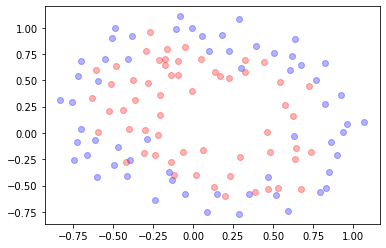

In [12]:
print("Plotting the training data")
plt.figure()
plt.scatter(x_label0, y_label0, alpha=0.3, c='b')
plt.scatter(x_label1, y_label1, alpha=0.3, c='r')
plt.show()

### **2. Define High dimensional Function**
$\ g(x, y; \theta) = \theta_0 + \theta_1x + \theta_2y + \theta_3xy + \theta_4x^2 + \theta_5y^2  $  

### **3. Plotting the Training Error**

Plotting the Training Error


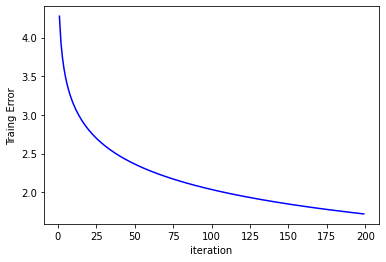

In [22]:
print("Plotting the Training Error")
plt.plot(iters, train_costs1, 'b')
#plt.plot(iters, train_costs2)
#plt.plot(iters, train_costs3)
#plt.plot(iters, train_costs4)
#plt.plot(iters, train_costs5)
plt.xlabel('iteration')
plt.ylabel('Traing Error')
plt.show()

### **4. Plotting the Training Accuracy**

Plotting the Training Accuracy


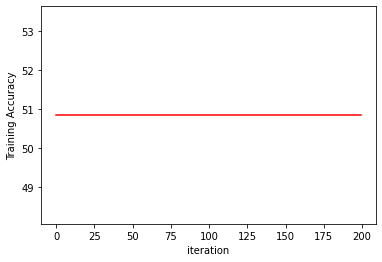

In [23]:
print("Plotting the Training Accuracy")
plt.plot(iters, accuracys1, 'r')
#plt.plot(iters, accuracys2)
#plt.plot(iters, accuracys3)
#plt.plot(iters, accuracys4)
#plt.plot(iters, accuracys5)
plt.xlabel('iteration')
plt.ylabel('Training Accuracy')
plt.show()

### **5. Final Training Accuracy**

In [24]:
print("Final Training Accuracy : ",accuracys1[-1],"%")
print("Final Training Accuracy : ",accuracys2[-1],"%")
print("Final Training Accuracy : ",accuracys3[-1],"%")
print("Final Training Accuracy : ",accuracys4[-1],"%")
print("Final Training Accuracy : ",accuracys5[-1],"%")

Final Training Accuracy :  50.847457627118644 %


IndexError: ignored

### **6. Plotting the Optimal Classifer superimposed on the Training Data**

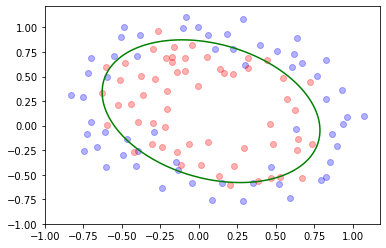

In [0]:
theta_0 = theta_0s[-1]
theta_1 = theta_1s[-1]
theta_2 = theta_2s[-1]
theta_3 = theta_3s[-1]
theta_4 = theta_4s[-1]
theta_5 = theta_5s[-1]

Xmesh, Ymesh = np.meshgrid(np.linspace(-1.0, 1.0, 300), np.linspace(-1.0, 1.0, 300))

Z= theta_0 + theta_1 * Xmesh + theta_2 * Ymesh + theta_3 * Xmesh*Ymesh + theta_4 * Xmesh**2 + theta_5 * Ymesh**2
fig = plt.figure()
levels = [0]
grpah7 = plt.contour(Xmesh, Ymesh, Z, levels, colors = 'green')
graph8 = plt.scatter(x_label0, y_label0, alpha=0.3, c='b')
graph9 = plt.scatter(x_label1, y_label1, alpha=0.3, c='r')
plt.show()

In [8]:
cost = 0
lambda_data = 1
theta_data = [1, 2, 3]
cost += lambda_data / 2 * np.sum(np.square(theta_data)) 
print(cost)

7.0


In [92]:
print(accuracys1)
print(iters)
print(train_costs1)

print(accuracys2)
print(iters)
print(train_costs2)

print(accuracys3)
print(iters)
print(train_costs3)

print(len(accuracys1))
print(len(iters))
print(len(train_costs1))

deque([50.847457627118644, 50.847457627118644, 50.847457627118644, 50.847457627118644, 50.847457627118644, 50.847457627118644, 50.847457627118644, 50.847457627118644, 50.847457627118644, 50.847457627118644, 50.847457627118644, 50.847457627118644, 50.847457627118644, 50.847457627118644, 50.847457627118644, 50.847457627118644, 50.847457627118644, 50.847457627118644, 50.847457627118644, 50.847457627118644, 50.847457627118644, 50.847457627118644, 50.847457627118644, 50.847457627118644, 50.847457627118644, 50.847457627118644, 50.847457627118644, 50.847457627118644, 50.847457627118644, 50.847457627118644, 50.847457627118644, 50.847457627118644, 50.847457627118644, 50.847457627118644, 50.847457627118644, 50.847457627118644, 50.847457627118644, 50.847457627118644, 50.847457627118644, 50.847457627118644, 50.847457627118644, 50.847457627118644, 50.847457627118644, 50.847457627118644, 50.847457627118644, 50.847457627118644, 50.847457627118644, 50.847457627118644, 50.847457627118644, 50.8474576271

In [36]:
print(len(accuracys2))
print(len(train_costs2))
print(train_costs2)
print(accuracys2)

0
0
deque([])
deque([])


In [93]:
print(len(accuracys1))
print(len(train_costs1))
print(train_costs1)
print(accuracys1)

100
100
deque([nan, 3.145144650940523, 2.8068828897675937, 2.6100096296022244, 2.4710152453640997, 2.3637287765481223, 2.276493020479334, 2.2030897054077507, 2.1398071081678567, 2.0842511189122943, 2.034787081402432, 1.9902490849746508, 1.9497762857087058, 1.912714969195978, 1.8785570116144572, 1.8468996234014843, 1.817418111641345, 1.7898469144131617, 1.763966064351896, 1.7395913169538064, 1.7165668139377652, 1.694759538472405, 1.6740550614714704, 1.654354234209882, 1.6355705853513591, 1.617628249685943, 1.6004603033410183, 1.584007413347277, 1.5682167329133534, 1.5530409906392288, 1.5384377341936823, 1.524368698048209, 1.5107992716222194, 1.4976980492907728, 1.4850364475845446, 1.4727883778901807, 1.4609299652659857, 1.4494393057887769, 1.4382962562641923, 1.4274822512546992, 1.4169801432741613, 1.4067740627156322, 1.396849294658394, 1.387192170170537, 1.377789970107098, 1.3686308397185007, 1.3597037126434064, 1.3509982430748015, 1.3425047450667096, 1.3342141380979773, nan, nan, nan,